# Titanic (2)

In [2]:
import pandas as pd
titanic = pd.read_csv("../datasources/titanic/train.csv")

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

def myscore(clf, X, y):
    xval = cross_val_score(clf, X, y, cv = 5)
    return xval.mean() * 100

lr1 = LogisticRegression()

## Ajoutons la classe aux caractéristiques (Reg. Log)

Analyse de la carractéristique Pclass

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


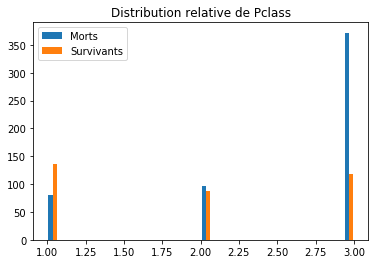

In [15]:
import numpy as np
import matplotlib.pyplot as plt

def plt_feature(feature, bins = 30):
    m = titanic[titanic.Survived == 0][feature].dropna()
    s = titanic[titanic.Survived == 1][feature].dropna()
    plt.hist([m, s], label=['Morts', 'Survivants'], bins = bins)
    plt.legend(loc = 'upper left')
    plt.title('Distribution relative de %s' %feature)
    plt.show()
plt_feature('Pclass')

Prépare un modèle avec les classes divisées en 3 colonnes

In [4]:
def Prepare_Modele_2(X):
    target = X.Survived
    to_del = ['Name', 'Age', 'Cabin', 'Embarked', 'Survived', 'Ticket', 'Sex']
    for col in to_del : del X[col]
    return X, target

In [5]:
X, y = Prepare_Modele_2(titanic.copy())

In [6]:
X.head(5)

,PassengerId,Pclass,SibSp,Parch,Fare
0,1,3,1,0,7.2500
1,2,1,1,0,71.2833
2,3,3,0,0,7.9250
3,4,1,1,0,53.1000
4,5,3,0,0,8.0500


### Calculons notre nouveau score

In [7]:
compute_score(lr1, X, y)

NameError: name 'compute_score' is not defined

## Ajoutons le sexe aux caractéristiques (Reg. Log)

Analysons la carractéristique Sex

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


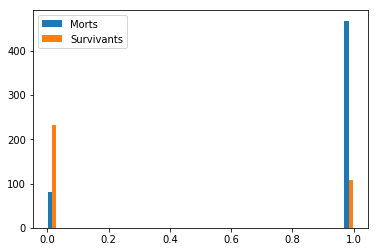

In [8]:
parSexe = [1 if passager == 'male' else 0 for passager in titanic.Sex]
titanic["SexCode"] = [1 if passager == 'male' else 0 for passager in titanic.Sex]
m = titanic[titanic.Survived == 0]["SexCode"].dropna()
s = titanic[titanic.Survived == 1]["SexCode"].dropna()
plt.hist([m, s], label=['Morts', 'Survivants'], bins = 30)
plt.legend()

## Une erreur bien justifiée ! il faut des caractéristiques numériques ... transformons le sexe en données numériques donc !

In [9]:
def Prepare_Modele_3(X):
    target = X.Survived
    sexe = pd.get_dummies(X['Sex'], prefix='sex')
    X = X.join(sexe)
    to_del = ['Name', 'Age', 'Cabin', 'Embarked', 'Survived', 'Ticket', 'Sex']
    for col in to_del : del X[col]
    return X, target
X, y = Prepare_Modele_3(titanic.copy())
X.head(5)

,PassengerId,Pclass,SibSp,Parch,Fare,SexCode,sex_female,sex_male
0,1,3,1,0,7.2500,1,0,1
1,2,1,1,0,71.2833,0,1,0
2,3,3,0,0,7.9250,0,1,0
3,4,1,1,0,53.1000,0,1,0
4,5,3,0,0,8.0500,1,0,1


### Calculons notre nouveau score

In [10]:
myscore(lr1, X, y)

79.45930313176139

## Pondération des caractéristiques

In [11]:
lr1.fit(X, y)
lr1.coef_

array([[ 1.30353976e-04, -7.76295120e-01, -2.52874759e-01,
        -8.65266151e-02,  4.05855252e-03, -5.01180685e-01,
         1.69495624e+00, -5.01180685e-01]])

# Ajoutons l'age maintenant

In [12]:
def Prepare_Modele_4(X):
    target = X.Survived
    sexe = pd.get_dummies(X['Sex'], prefix='sex')
    X.Age = X.Age.fillna(X.Age.median())
    X = X.join(sexe)
    to_del = ['Name', 'Cabin', 'Embarked', 'Survived', 'Ticket', 'Sex']
    for col in to_del : del X[col]
    return X, target
X, y = Prepare_Modele_4(titanic.copy())
X.head(5)

,PassengerId,Pclass,Age,SibSp,Parch,Fare,SexCode,sex_female,sex_male
0,1,3,22.0,1,0,7.2500,1,0,1
1,2,1,38.0,1,0,71.2833,0,1,0
2,3,3,26.0,0,0,7.9250,0,1,0
3,4,1,35.0,1,0,53.1000,0,1,0
4,5,3,35.0,0,0,8.0500,1,0,1


In [13]:
myscore(lr1, X, y)

78.45434424656898

In [14]:
X['Enfant'] = X.Age < 9
myscore(lr1, X, y)

81.03299291755015